In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import os
import scipy
import scipy.io as sio
from utility_functions import sparsifyDynamics, poolData

In [73]:
from matplotlib import style
style.use('dark_background')

In [89]:
# load saved data from .mat file
data = sio.loadmat('../models/data/REFSIM-25hr.mat', chars_as_strings=1)
t = data['t']
x = data['x']
names = data['names']
names = np.array([str(''.join(letter)) for letter_array in names for letter in letter_array])

# only keep non-constant data
dynamics = [0,1,2,3,4,5,6,7,8,9]
x = x[:, dynamics]
names = names[dynamics]

# scale all data from Mol/L to MilliMols/L
x *= 1000

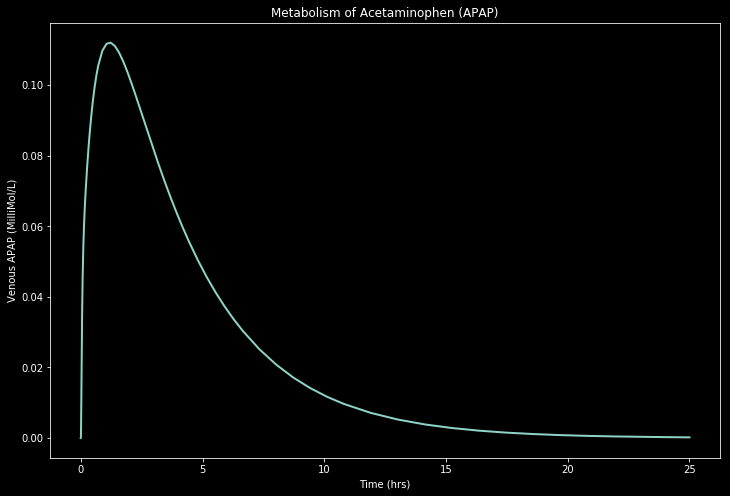

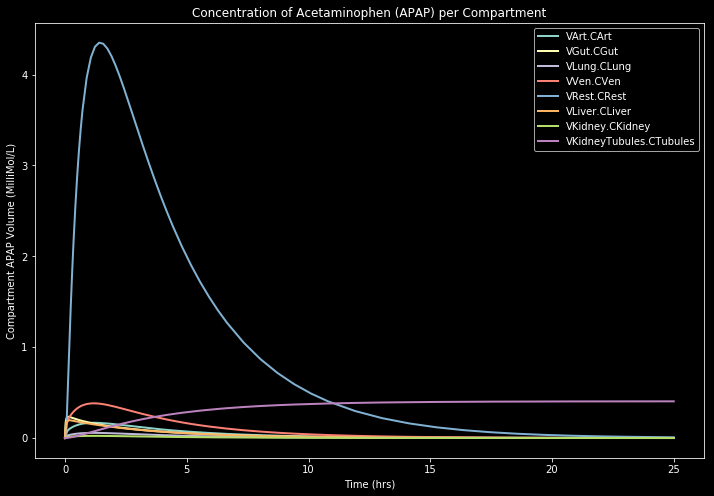

In [90]:
# plot the amount of APAP in venous blood over time
venousAPAPInLiters = x[:, 4] / 3.41;
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, venousAPAPInLiters, '-', linewidth=2)
plt.xlabel('Time (hrs)')
plt.ylabel('Venous APAP (MilliMol/L)')
plt.title('Metabolism of Acetaminophen (APAP)')
plt.show()

compartments = [0,1,3,4,5,6,8,9]

# Create plots with pre-defined labels.
fig, ax = plt.subplots(figsize=(12,8))
for c in compartments:
      ax.plot(t, x[:, c], linewidth=2, label=names[c])
plt.xlabel('Time (hrs)')
plt.ylabel('Compartment APAP Volume (MilliMol/L)')
plt.title('Concentration of Acetaminophen (APAP) per Compartment')
ax.legend(loc='upper right')
plt.show()

In [92]:
xdf = pd.DataFrame(x)
n, nVars = x.shape
xdf_dot = xdf.diff()

# we lose one row, need to zero pad (or maybe not)
#x_dot = pd.concat([pd.DataFrame(np.zeros((1, nVars))), x_dot])
xdf_dot.loc[0, :] = 0.0

# variable labeling
cols = ['x{}'.format(i+'1') for i in names]
xdf.columns = cols
dot_labels = pd.Index([s + 'dot' for s in cols])

# SINDy params
polyorder = 1
lam = 0.000001
usesine = 0

# generate data
Theta = pd.DataFrame()
Theta = poolData(xdf_dot, nVars, polyorder, usesine)

# run SINDy
Xhat_df = sparsifyDynamics(Theta, xdf_dot, lam)
Xhat_df = Xhat_df.set_index(dot_labels)
Xhat_df

,0,0,1,2,3,4,5,6,7,8,9
xVArt.CArt1dot,0.0,0.996933,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000
xVGut.CGut1dot,0.0,0.000000,0.997579,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000
xVGutLumen.AGutlumen1dot,0.0,-13.160560,-0.000000,0.952689,26.150990,0.000000,-0.076435,-0.572799,-0.049401,37.121260,-0.000000
xVLung.CLung1dot,0.0,0.053838,0.000000,-0.000000,0.643731,0.027947,0.000000,0.000000,-0.000000,0.000000,-0.000000
xVVen.CVen1dot,0.0,1.009374,0.000000,-0.000147,2.090412,0.055536,0.010620,0.175645,-0.000000,0.000000,-0.000000
xVRest.CRest1dot,0.0,16.025666,0.000000,-0.538898,-2.455417,-0.000000,0.342480,-2.223651,-0.241203,-101.530717,-6.980453
xVLiver.CLiver1dot,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.997379,-0.000000,0.000000,-0.000000
xVLiver.CMetabolized1dot,0.0,-4.023094,-0.568632,-0.288808,-16.640949,-0.157580,-0.208010,0.919021,0.559566,47.198899,3.003489
xVKidney.CKidney1dot,0.0,0.061356,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.551775,-0.000000
xVKidneyTubules.CTubules1dot,0.0,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.005197,-0.000000,0.033474,-0.159266,0.264679


In [ ]:
Xhat_df.to_csv('')